In [101]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [2]:
dataframe = pd.read_excel("fitur_combined.xlsx")
dataframe

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,66.258988,61.227073,67.783226,65.158415,2.446483,0.055664,0.356445,0.263221,47.929862,72.003950,1.502277,1
1,64.446686,55.173210,58.302508,56.017323,0.943396,0.061523,0.308594,0.270054,41.226092,66.227144,1.606438,1
2,62.692141,99.537279,79.573600,75.421263,3.571429,0.042969,0.290039,0.286273,56.264081,128.622281,2.286046,1
3,63.433824,92.245610,64.134624,60.074981,4.487179,0.056641,0.389648,0.316059,45.349569,121.406513,2.677126,1
4,62.803729,58.825938,82.869466,79.547163,2.258065,0.047852,0.297852,0.333677,58.597402,58.808881,1.003609,1
...,...,...,...,...,...,...,...,...,...,...,...,...
375,77.975022,115.369311,47.334256,36.668310,18.783069,0.041992,0.237305,1.660196,33.469633,159.627078,4.769311,0
376,61.620302,129.153809,107.123572,97.890381,20.469799,0.061523,0.225586,0.217286,75.747572,166.099565,2.192804,0
377,79.215083,121.597106,57.423703,47.552360,16.492147,0.066406,0.249023,3.201225,40.600369,166.697921,4.105823,0
378,69.334370,137.593830,121.752307,112.744990,13.636364,0.085938,0.200195,1.629231,86.090591,174.288084,2.024473,0


In [74]:
X = dataframe[["SDNN", "SD2", "RMSSD", "SD1", "SDSD", "pNN50", "LF", "HR"]]
# X = dataframe[["SDNN", "SD2", "RMSSD", "SD1"]]



y = dataframe["Label"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [88]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=64, input_shape=(8,), activation="relu"),
        tf.keras.layers.Dense(units=512, activation="relu"),
        tf.keras.layers.Dense(units=128, activation="relu"),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

In [89]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


history = model.fit(X, y, epochs=1000, batch_size=200)

Epoch 1/1000
1/1 [==============================] - 1s 527ms/step - loss: 0.9200 - accuracy: 0.3316
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.8914 - accuracy: 0.6079
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.3180 - accuracy: 0.5026
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.8534 - accuracy: 0.7053
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.1074 - accuracy: 0.7632
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.3551 - accuracy: 0.7395
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.0110 - accuracy: 0.7816
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7546 - accuracy: 0.7237
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.0236 - accuracy: 0.6605
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.9418 - accuracy: 0.6605
Epoch 11/1000
1/1

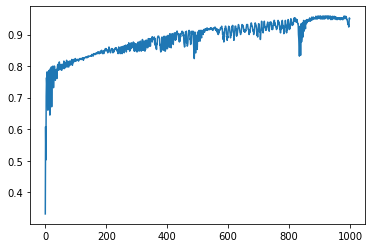

In [90]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.show()

In [91]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

3/3 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.9737
Loss: 0.08278670161962509
Accuracy: 0.9736841917037964


In [97]:
X_test

,SDNN,SD2,RMSSD,SD1,SDSD,pNN50,LF,HR
278,44.239326,58.097926,29.975268,21.194897,18.660397,9.666667,0.063477,60.686226
159,75.490157,103.842867,34.451064,24.360218,21.044169,15.286624,0.044922,63.655378
192,16.935699,20.625561,17.180988,12.148773,10.576174,0.310559,0.052734,65.047114
175,101.124253,137.593916,54.720192,38.692829,41.670284,21.511628,0.047852,70.449874
205,34.783671,32.847897,51.678434,36.542008,48.574423,1.851852,0.042969,65.313163
...,...,...,...,...,...,...,...,...
200,22.710217,30.776601,12.786285,9.041242,7.764284,0.000000,0.040039,64.878555
244,35.281839,46.321468,26.226331,18.544816,18.987523,4.419890,0.059570,73.157363
330,61.632441,85.221869,21.578294,15.249982,15.899906,3.037975,0.040039,79.978208
198,22.298213,30.268718,12.180436,8.612723,7.325827,0.000000,0.063477,88.344294


In [98]:
prediction = model.predict(X_test)
predicted_labels = (prediction > 0.5).astype(int)
print(predicted_labels)

3/3 [==============================] - 0s 2ms/step
[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]]


Text(91.68, 0.5, 'predicted class')

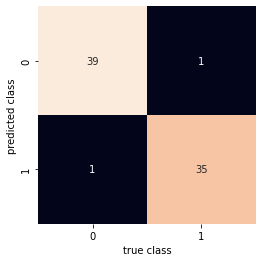

In [104]:
conmat = confusion_matrix(y_test, predicted_labels)
sns.heatmap(conmat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true class")
plt.ylabel("predicted class")